In [6]:
# Basic Packages
from __future__ import division
import os
from datetime import datetime

# Web & file access
import requests
import io

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%pylab --no-import-all
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")

import plotly.express as px
import plotly.graph_objects as go

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# Next line can import all of plotnine, but may overwrite things? Better import each function/object you need
#from plotnine import *

# Data
import pandas as pd
import numpy as np
from pandas_datareader import data, wb

# GIS & maps
import geopandas as gpd
gp = gpd
import georasters as gr
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import textwrap

# Data Munging
from itertools import product, combinations
import difflib
import pycountry
import geocoder
from geonamescache.mappers import country
mapper = country(from_key='name', to_key='iso3')
mapper2 = country(from_key='iso3', to_key='iso')
mapper3 = country(from_key='iso3', to_key='name')

# Regressions & Stats
from scipy.stats import norm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer, LineLocation

# Paths
pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)
#code:
wdi_indicators_patents = ['IP.PAT.NRES', 'IP.PAT.RESD']
#https://data.worldbank.org/indicator/IP.PAT.NRES
#https://data.worldbank.org/indicator/IP.PAT.RESD
wdi = wb.download(
    indicator=wdi_indicators_patents, country=list_of_countries_ISO_A2_codes, start=start_year, end=end_year)

Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


NameError: name 'list_of_countries_ISO_A2_codes' is not defined

<div class="alert alert-block alert-warning">
    <b>Exercise 1:</b> Get WDI data on <b>patent applications by residents and non-residents in each country</b>. Create a new variable that shows the total patents for each country.
</div>


<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Using the <code>my_xy_plot</code> function plot the relation between <b>GDP per capita</b> and <b>total patents</b> in the years 1990, 1995, 2000, 2010, 2020.
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 3:</b> Using the <code>my_xy_line_plot</code> function plot the evolution of <b>GDP per capita</b> and <b>total patents</b> by income groups and regions (separate figures).
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 4:</b> Plot the relation between patenting activity by <b>residents and non-residents</b> in the year 2015. Make sure to show the 45 degree line so you can see how similar they are.
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 5:</b> Create a static and a dynamic map for patenting activity in the year 2015 across the world. 
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 6:</b> Explore the relation between economic development as measured by Log[GDP per capita] and patenting activity. Show the relation for residents, non-residents, and total, all in one nice looking table. Also, produce a few nice looking figures.
</div>

In [7]:
from pandas_datareader import wb, data
import pandas as pd

In [8]:
wbcountries = wb.get_countries()
wbcountries = wbcountries[wbcountries['region'] != "Aggregates"]
wbcountries = wbcountries[wbcountries['iso3c'].notnull()]


wbcountries

iso3c iso2c          name                      region  \
0     ABW    AW         Aruba  Latin America & Caribbean    
2     AFG    AF   Afghanistan                  South Asia   
5     AGO    AO        Angola         Sub-Saharan Africa    
6     ALB    AL       Albania       Europe & Central Asia   
7     AND    AD       Andorra       Europe & Central Asia   
..    ...   ...           ...                         ...   
293   XKX    XK        Kosovo       Europe & Central Asia   
295   YEM    YE   Yemen, Rep.  Middle East & North Africa   
296   ZAF    ZA  South Africa         Sub-Saharan Africa    
297   ZMB    ZM        Zambia         Sub-Saharan Africa    
298   ZWE    ZW      Zimbabwe         Sub-Saharan Africa    

                                           adminregion          incomeLevel  \
0                                                               High income   
2                                           South Asia           Low income   
5           Sub-Saharan Africa (excluding high income)  Lower middle income   
6        Europe & Central Asia (excluding high income)  Upper middle income   
7                                                               High income   
..                                                 ...                  ...   
293      Europe & Central Asia (excluding high income)  Upper middle income   
295  Middle East & North Africa (excluding high inc...           Low income   
296         Sub-Saharan Africa (excluding high income)  Upper middle income   
297         Sub-Saharan Africa (excluding high income)           Low income   
298         Sub-Saharan Africa (excluding high income)  Lower middle income   

        lendingType       capitalCity  longitude  latitude  
0    Not classified        Oranjestad   -70.0167  12.51670  
2               IDA             Kabul    69.1761  34.52280  
5              IBRD            Luanda    13.2420  -8.81155  
6              IBRD            Tirane    19.8172  41.33170  
7    Not classified  Andorra la Vella     1.5218  42.50750  
..              ...               ...        ...       ...  
293             IDA          Pristina    20.9260  42.56500  
295             IDA            Sana'a    44.2075  15.35200  
296            IBRD          Pretoria    28.1871 -25.74600  
297             IDA            Lusaka    28.2937 -15.39820  
298           Blend            Harare    31.0672 -17.83120  

[218 rows x 10 columns]

In [9]:
# non_residents
non_residents = wb.download(indicator="IP.PAT.NRES", country=wbcountries.iso2c.values, start=1950, end=2020)
non_residents = non_residents[non_residents['IP.PAT.NRES'].notnull()]
non_residents = non_residents.reset_index()
residents = wb.download(indicator="IP.PAT.RESD", country=wbcountries.iso2c.values, start=1950, end=2020)
residents = residents[residents['IP.PAT.RESD'].notnull()]
residents = residents.reset_index()
residents.head()

/Users/colinduggan/opt/anaconda3/envs/EconGrowthUG/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: JG, XK
/Users/colinduggan/opt/anaconda3/envs/EconGrowthUG/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: JG, XK


country  year  IP.PAT.RESD
0   Aruba  2002          1.0
1  Angola  2020         85.0
2  Angola  2019          2.0
3  Angola  2018          6.0
4  Angola  1992          4.0

In [10]:
# patents
patents = residents.merge(non_residents, on=['country', 'year'])
patents = patents.reset_index()
patents['total_patents'] = patents['IP.PAT.RESD']+ patents['IP.PAT.NRES']

patents.head()

index  country  year  IP.PAT.RESD  IP.PAT.NRES  total_patents
0      0   Angola  2019          2.0        108.0          110.0
1      1   Angola  2018          6.0        114.0          120.0
2      2   Angola  1992          4.0          2.0            6.0
3      3  Albania  2019          4.0          1.0            5.0
4      4  Albania  2018         15.0          3.0           18.0

In [11]:
df = wbcountries.merge(patents, left_on='name', right_on='country')
df.head()

iso3c iso2c     name                 region  \
0   AGO    AO   Angola    Sub-Saharan Africa    
1   AGO    AO   Angola    Sub-Saharan Africa    
2   AGO    AO   Angola    Sub-Saharan Africa    
3   ALB    AL  Albania  Europe & Central Asia   
4   ALB    AL  Albania  Europe & Central Asia   

                                     adminregion          incomeLevel  \
0     Sub-Saharan Africa (excluding high income)  Lower middle income   
1     Sub-Saharan Africa (excluding high income)  Lower middle income   
2     Sub-Saharan Africa (excluding high income)  Lower middle income   
3  Europe & Central Asia (excluding high income)  Upper middle income   
4  Europe & Central Asia (excluding high income)  Upper middle income   

  lendingType capitalCity  longitude  latitude  index  country  year  \
0        IBRD      Luanda    13.2420  -8.81155      0   Angola  2019   
1        IBRD      Luanda    13.2420  -8.81155      1   Angola  2018   
2        IBRD      Luanda    13.2420  -8.81155      2   Angola  1992   
3        IBRD      Tirane    19.8172  41.33170      3  Albania  2019   
4        IBRD      Tirane    19.8172  41.33170      4  Albania  2018   

   IP.PAT.RESD  IP.PAT.NRES  total_patents  
0          2.0        108.0          110.0  
1          6.0        114.0          120.0  
2          4.0          2.0            6.0  
3          4.0          1.0            5.0  
4         15.0          3.0           18.0

In [26]:
wdi_indicators = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.PCAP.KD', 'SL.GDP.PCAP.EM.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.DYN.WFRT', 'SP.DYN.TFRT.IN']
wdi = wb.download(indicator = wdi_indicators, 
                 country=wbcountries.iso2c.values, start=1950, end=2020 )
wdi

/Users/colinduggan/opt/anaconda3/envs/EconGrowthUG/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: JG, XK


NY.GDP.PCAP.PP.KD  NY.GDP.PCAP.KD  SL.GDP.PCAP.EM.KD  \
country  year                                                         
Aruba    2020       29563.756955    23026.332866                NaN   
         2019       38221.117314    29769.293907                NaN   
         2018       39206.356147    30536.667193                NaN   
         2017       38893.960556    30293.351539                NaN   
         2016       37046.877414    28854.713299                NaN   
...                          ...             ...                ...   
Zimbabwe 1964                NaN     1152.997692                NaN   
         1963                NaN     1206.107233                NaN   
         1962                NaN     1174.431444                NaN   
         1961                NaN     1197.603795                NaN   
         1960                NaN     1164.740250                NaN   

               SP.POP.GROW  SP.POP.TOTL  SP.DYN.WFRT  SP.DYN.TFRT.IN  
country  year                                                         
Aruba    2020     0.428017     106766.0          NaN           1.901  
         2019     0.437415     106310.0          NaN           1.901  
         2018     0.459266     105846.0          NaN           1.896  
         2017     0.471874     105361.0          NaN           1.886  
         2016     0.502860     104865.0          NaN           1.872  
...                    ...          ...          ...             ...  
Zimbabwe 1964     3.390942    4322854.0          NaN           7.347  
         1963     3.395753    4178726.0          NaN           7.311  
         1962     3.378137    4039209.0          NaN           7.267  
         1961     3.342246    3905038.0          NaN           7.215  
         1960          NaN    3776679.0          NaN           7.158  

[13237 rows x 7 columns]

In [32]:
wdi = wdi.reset_index()

In [34]:
df = df.merge(wdi, left_on=['country', 'year'], right_on=['country', 'year'])
df

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [35]:
def my_xy_plot(dfin, 
               x='SP.POP.GROW', 
               y='ln_gdp_pc', 
               labelvar='iso3c', 
               dx=0.006125, 
               dy=0.006125, 
               xlogscale=False, 
               ylogscale=False,
               xlabel='Growth Rate of Population', 
               ylabel='Log[Income per capita in ' +  str(2020) + ']',
               labels=False,
               xpct = False,
               ypct = False,
               OLS=False,
               OLSlinelabel='OLS',
               ssline=False,
               sslinelabel='45 Degree Line',
               filename='income-pop-growth.pdf',
               hue='region',
               hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                          'Latin America & Caribbean ', 'Middle East & North Africa',
                          'North America', 'South Asia', 'Sub-Saharan Africa '],
               style='incomeLevel', 
               style_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
               palette=None,
               size=None,
               sizes=None,
               legend_fontsize=10,
               label_font_size=12,
               save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels.
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.scatterplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    #hue='incomeLevel',
                    #hue_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                    #hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                    #           'Latin America & Caribbean ', 'Middle East & North Africa',
                    #           'North America', 'South Asia', 'Sub-Saharan Africa '],
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                    size=size,
                    sizes=sizes,
                    #palette=sns.color_palette("Blues_r", df[hue].unique().shape[0]+6)[:df[hue].unique().shape[0]*2:2],
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=label_font_size, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!=hue) & (labels!=style) & (labels!=size)])
    labels = list(labels[(labels!=hue) & (labels!=style) & (labels!=size)])
    ax.legend(handles=handles, labels=labels, fontsize=legend_fontsize)
    if save:
        plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    return fig

In [36]:
df['year'] = df.year.astype(int)
df['gdp_pc'] = df['NY.GDP.PCAP.PP.KD']
df['ln_gdp_pc'] = df['NY.GDP.PCAP.PP.KD'].apply(np.log)
df['ln_pop'] = df['SP.POP.TOTL'].apply(np.log)

df['name'] = df.name.str.strip()
df['incomeLevel'] = df['incomeLevel'].str.title()
df.loc[df.iso3c=='VEN', 'incomeLevel'] = 'Upper Middle Income'

In [37]:
years = [1990, 1995, 2000, 2010, 2020]
df_gdp_pc_patents = df[df['year'].isin(years)].dropna(subset=['ln_gdp_pc','ln_pop'])
df_gdp_pc_patents = df_gdp_pc_patents.sort_values(by='region').reset_index()
df_gdp_pc_patents['total_patents'] = df_gdp_pc_patents['total_patents'].apply(np.log)
df_gdp_pc_patents

index iso3c iso2c                  name               region  \
0     1320   HKG    HK  Hong Kong SAR, China  East Asia & Pacific   
1     1481   IDN    ID             Indonesia  East Asia & Pacific   
2     1486   IDN    ID             Indonesia  East Asia & Pacific   
3      603   CHN    CN                 China  East Asia & Pacific   
4     3022   SGP    SG             Singapore  East Asia & Pacific   
..     ...   ...   ...                   ...                  ...   
434   1078   ETH    ET              Ethiopia  Sub-Saharan Africa    
435   1064   ETH    ET              Ethiopia  Sub-Saharan Africa    
436   3352   UGA    UG                Uganda  Sub-Saharan Africa    
437    620   COD    CD      Congo, Dem. Rep.  Sub-Saharan Africa    
438   3662   ZWE    ZW              Zimbabwe  Sub-Saharan Africa    

                                     adminregion          incomeLevel  \
0                                                         High Income   
1    East Asia & Pacific (excluding high income)  Lower Middle Income   
2    East Asia & Pacific (excluding high income)  Lower Middle Income   
3    East Asia & Pacific (excluding high income)  Upper Middle Income   
4                                                         High Income   
..                                           ...                  ...   
434   Sub-Saharan Africa (excluding high income)           Low Income   
435   Sub-Saharan Africa (excluding high income)           Low Income   
436   Sub-Saharan Africa (excluding high income)           Low Income   
437   Sub-Saharan Africa (excluding high income)           Low Income   
438   Sub-Saharan Africa (excluding high income)  Lower Middle Income   

        lendingType  capitalCity  longitude  ...  NY.GDP.PCAP.PP.KD  \
0    Not classified                114.1090  ...       55917.647464   
1              IBRD      Jakarta   106.8300  ...        5689.260223   
2              IBRD      Jakarta   106.8300  ...        5892.071754   
3              IBRD      Beijing   116.2860  ...        3451.679231   
4    Not classified    Singapore   103.8500  ...       55904.233600   
..              ...          ...        ...  ...                ...   
434             IDA  Addis Ababa    38.7468  ...         727.766685   
435             IDA  Addis Ababa    38.7468  ...        2296.890440   
436             IDA      Kampala    32.5729  ...        2175.031098   
437             IDA     Kinshasa    15.3222  ...        1082.445242   
438           Blend       Harare    31.0672  ...        2652.129209   

     NY.GDP.PCAP.KD SL.GDP.PCAP.EM.KD  SP.POP.GROW   SP.POP.TOTL  SP.DYN.WFRT  \
0      41469.975506     114163.585019    -0.358933  7.481000e+06          NaN   
1       1867.548796      12898.669096     1.379908  2.115138e+08          NaN   
2       1934.123433      13931.907937     1.543736  1.969343e+08          NaN   
3       2193.892991       6175.400336     0.787957  1.262645e+09          NaN   
4      34890.715594     108220.252596     1.732042  4.027887e+06          NaN   
..              ...               ...          ...           ...          ...   
434      262.025313       1755.764632     2.882688  6.622481e+07          4.7   
435      826.973053       5096.388409     2.541386  1.149636e+08          NaN   
436      891.295904       6202.214476     3.269713  4.574100e+07          NaN   
437      505.348339       3252.262449     3.142652  8.956140e+07          NaN   
438     1623.930176               NaN     2.706407  1.043241e+07          NaN   

     SP.DYN.TFRT.IN        gdp_pc  ln_gdp_pc     ln_pop  
0             0.868  55917.647464  10.931635  15.827877  
1             2.512   5689.260223   8.646336  19.169801  
2             2.688   5892.071754   8.681363  19.098381  
3             1.596   3451.679231   8.146616  20.956475  
4             1.600  55904.233600  10.931395  15.208752  
..              ...           ...        ...        ...  
434           6.543    727.766685   6.589981  18.008566  
435      

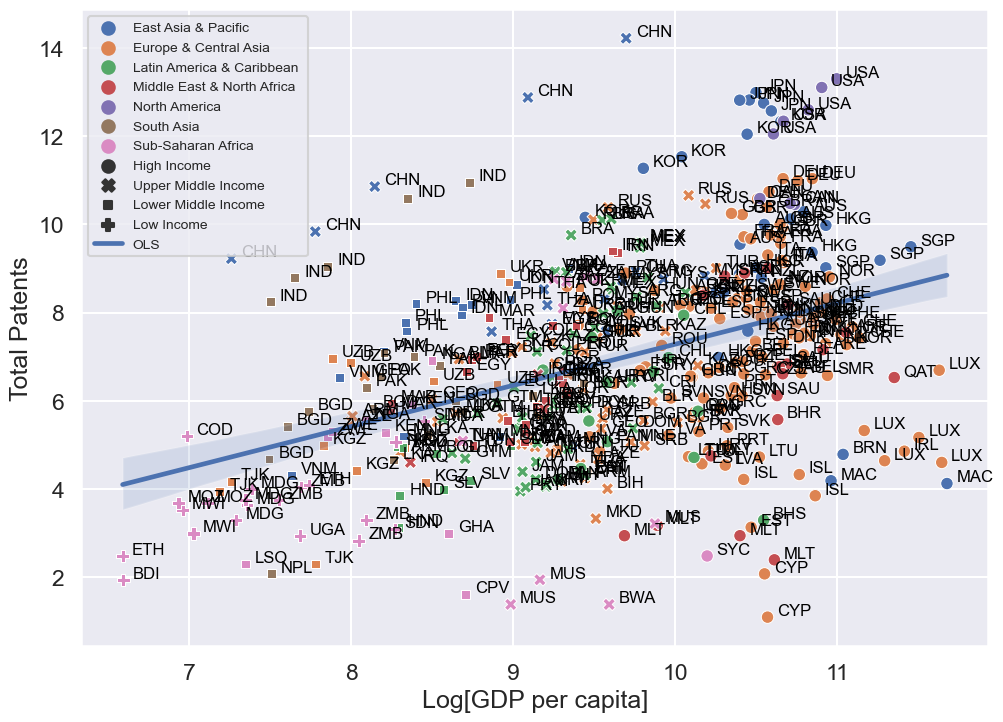

In [38]:
g = my_xy_plot(df_gdp_pc_patents, 
               x='ln_gdp_pc', 
               y='total_patents', 
               xlabel='Log[GDP per capita]', 
               ylabel='Total Patents', 
               OLS=True, 
               labels=True, 
#                ylogscale = True,
               #size="ln_pop", 
               #sizes=(10, 400), 
               filename='ln-gdp-pc-total-patents.pdf')

In [39]:
df.ln_gdp_pc.mean()

9.610718757334578

In [42]:
dfin = df.dropna(subset=['ln_gdp_pc','ln_pop'])
dfin = dfin.sort_values(by='region').reset_index()
dfin['total_patents'] = dfin['total_patents'].apply(np.log)
dfin

index iso3c iso2c         name               region  \
0      1903   KOR    KR  Korea, Rep.  East Asia & Pacific   
1      2717   PHL    PH  Philippines  East Asia & Pacific   
2      2718   PHL    PH  Philippines  East Asia & Pacific   
3      2719   PHL    PH  Philippines  East Asia & Pacific   
4      2720   PHL    PH  Philippines  East Asia & Pacific   
...     ...   ...   ...          ...                  ...   
2842   2390   MUS    MU    Mauritius  Sub-Saharan Africa    
2843   2389   MUS    MU    Mauritius  Sub-Saharan Africa    
2844   2388   MUS    MU    Mauritius  Sub-Saharan Africa    
2845   2400   MWI    MW       Malawi  Sub-Saharan Africa    
2846   3662   ZWE    ZW     Zimbabwe  Sub-Saharan Africa    

                                      adminregion          incomeLevel  \
0                                                          High Income   
1     East Asia & Pacific (excluding high income)  Lower Middle Income   
2     East Asia & Pacific (excluding high income)  Lower Middle Income   
3     East Asia & Pacific (excluding high income)  Lower Middle Income   
4     East Asia & Pacific (excluding high income)  Lower Middle Income   
...                                           ...                  ...   
2842   Sub-Saharan Africa (excluding high income)  Upper Middle Income   
2843   Sub-Saharan Africa (excluding high income)  Upper Middle Income   
2844   Sub-Saharan Africa (excluding high income)  Upper Middle Income   
2845   Sub-Saharan Africa (excluding high income)           Low Income   
2846   Sub-Saharan Africa (excluding high income)  Lower Middle Income   

         lendingType capitalCity  longitude  ...  NY.GDP.PCAP.PP.KD  \
0     Not classified       Seoul   126.9570  ...       32363.968659   
1               IBRD      Manila   121.0350  ...        7300.136210   
2               IBRD      Manila   121.0350  ...        6973.638909   
3               IBRD      Manila   121.0350  ...        6666.250512   
4               IBRD      Manila   121.0350  ...        6351.264942   
...              ...         ...        ...  ...                ...   
2842            IBRD  Port Louis    57.4977  ...        9998.617114   
2843            IBRD  Port Louis    57.4977  ...       10435.798365   
2844            IBRD  Port Louis    57.4977  ...       10953.676885   
2845             IDA    Lilongwe    33.7703  ...        1127.195856   
2846           Blend      Harare    31.0672  ...        2652.129209   

      NY.GDP.PCAP.KD SL.GDP.PCAP.EM.KD  SP.POP.GROW  SP.POP.TOTL  SP.DYN.WFRT  \
0       23948.472244      65571.756947     0.514683   49307835.0          NaN   
1        3001.043182      18110.362690     1.579363  102113206.0          NaN   
2        2866.822056      17276.530044     1.646682  100513137.0          NaN   
3        2740.456489      16772.194364     1.692088   98871558.0          2.2   
4        2610.967768      15982.714520     1.704126   97212639.0          NaN   
...              ...               ...          ...          ...          ...   
2842     4653.437938      25785.129406     1.022765    1133996.0          NaN   
2843     4856.905657      26837.667976     1.252098    1148284.0          NaN   
2844     5097.930543      28060.383468     1.051422    1160421.0          NaN   
2845      294.343918       2866.782081     2.676386   11148751.0          5.2   
2846     1623.930176               NaN     2.706407   10432409.0          NaN   

      SP.DYN.TFRT.IN        gdp_pc  ln_gdp_pc     ln_pop  
0              1.149  32363.968659  10.384801  17.713594  
1              2.805   7300.136210   8.895648  18.441593  
2              2.894   6973.638909   8.849892  18.425799  
3              2.979   6666.250512   8.804813  18.409332  
4              3.055   6351.264942   8.756409  18.392411  
...              ...           ...        ...        ...  
2842           2.120   9998.617114   9.210202  13.941258  
2843           2.040  10435.798365   9.252997  13.953779  
2844           1.970  10953

In [45]:
def my_xy_line_plot(dfin, 
               x='SP.POP.GROW', 
               y='ln_gdp_pc', 
               labelvar='iso3c', 
               dx=0.006125, 
               dy=0.006125, 
               xlogscale=False, 
               ylogscale=False,
               xlabel='Growth Rate of Population', 
               ylabel='Log[Income per capita in ' +  str(2020) + ']',
               labels=False,
               xpct = False,
               ypct = False,
               OLS=False,
               OLSlinelabel='OLS',
               ssline=False,
               sslinelabel='45 Degree Line',
               filename='income-pop-growth.pdf',
               hue='region',
               hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                          'Latin America & Caribbean ', 'Middle East & North Africa',
                          'North America', 'South Asia', 'Sub-Saharan Africa '],
               style='incomeLevel', 
               style_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
               palette=None,
               fontsize=10,
               save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels. 
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.lineplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=12, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!='region') & (labels!='incomeLevel')])
    labels = list(labels[(labels!='region') & (labels!='incomeLevel')])
    ax.legend(handles=handles, labels=labels, fontsize=fontsize)
    if save:
        plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    return fig

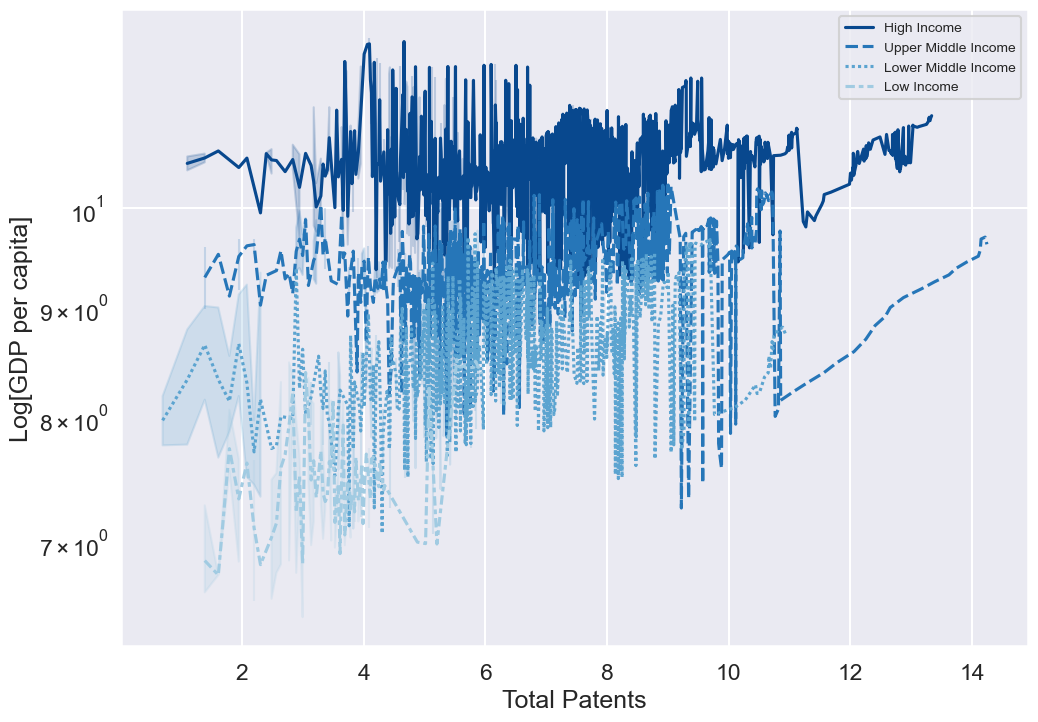

In [48]:
palette=sns.color_palette("Blues_r", df['incomeLevel'].unique().shape[0]+6)[:df['incomeLevel'].unique().shape[0]*2:2]
fig = my_xy_line_plot(dfin, 
                x='total_patents', 
                y='ln_gdp_pc', 
                xlabel='Total Patents',
                ylabel='Log[GDP per capita]',
                filename='ln-gdp-pc-ls-total-patents.pdf',
                hue='incomeLevel',
                hue_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                palette=palette,
                OLS=False, 
                labels=False,
                save=True,
                     ylogscale = True,)

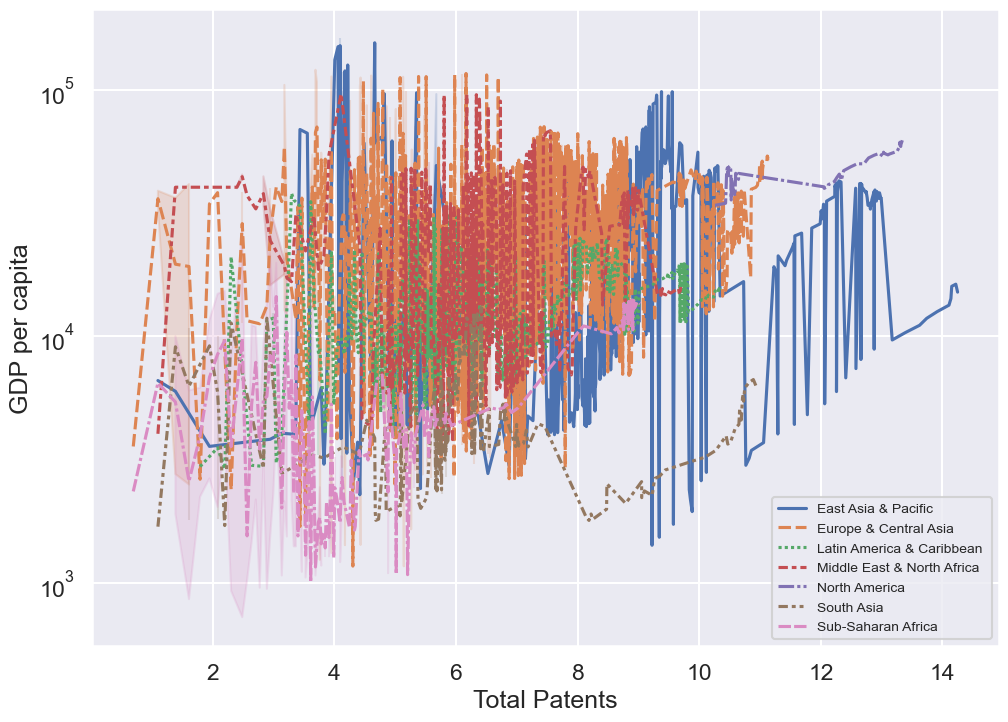

In [50]:
fig = my_xy_line_plot(dfin, 
                      x='total_patents', 
                      y='gdp_pc', 
                      xlabel='Total Patents',
                      ylabel='GDP per capita',
                      ylogscale=True,
                      filename='ln-gdp-pc-regions-TS.pdf',
                      style='region',
                      style_order=['East Asia & Pacific', 'Europe & Central Asia',
                                   'Latin America & Caribbean ', 'Middle East & North Africa',
                                   'North America', 'South Asia', 'Sub-Saharan Africa '],
                      #palette=palette,
                      OLS=False, 
                      labels=False,
                      save=True)

In [51]:
df_2015 = df[df['year'] == 2015]
df_2015

iso3c iso2c                  name                      region  \
7      ALB    AL               Albania       Europe & Central Asia   
18     ARE    AE  United Arab Emirates  Middle East & North Africa   
29     ARG    AR             Argentina  Latin America & Caribbean    
65     ARM    AM               Armenia       Europe & Central Asia   
93     AUS    AU             Australia         East Asia & Pacific   
...    ...   ...                   ...                         ...   
3559   WSM    WS                 Samoa         East Asia & Pacific   
3565   YEM    YE           Yemen, Rep.  Middle East & North Africa   
3586   ZAF    ZA          South Africa         Sub-Saharan Africa    
3627   ZMB    ZM                Zambia         Sub-Saharan Africa    
3656   ZWE    ZW              Zimbabwe         Sub-Saharan Africa    

                                            adminregion          incomeLevel  \
7         Europe & Central Asia (excluding high income)  Upper Middle Income   
18                                                               High Income   
29    Latin America & Caribbean (excluding high income)  Upper Middle Income   
65        Europe & Central Asia (excluding high income)  Upper Middle Income   
93                                                               High Income   
...                                                 ...                  ...   
3559        East Asia & Pacific (excluding high income)  Lower Middle Income   
3565  Middle East & North Africa (excluding high inc...           Low Income   
3586         Sub-Saharan Africa (excluding high income)  Upper Middle Income   
3627         Sub-Saharan Africa (excluding high income)           Low Income   
3656         Sub-Saharan Africa (excluding high income)  Lower Middle Income   

         lendingType   capitalCity  longitude  latitude  ...  \
7               IBRD        Tirane    19.8172   41.3317  ...   
18    Not classified     Abu Dhabi    54.3705   24.4764  ...   
29              IBRD  Buenos Aires   -58.4173  -34.6118  ...   
65              IBRD       Yerevan    44.5090   40.1596  ...   
93    Not classified      Canberra   149.1290  -35.2820  ...   
...              ...           ...        ...       ...  ...   
3559             IDA          Apia  -171.7520  -13.8314  ...   
3565             IDA        Sana'a    44.2075   15.3520  ...   
3586            IBRD      Pretoria    28.1871  -25.7460  ...   
3627             IDA        Lusaka    28.2937  -15.3982  ...   
3656           Blend        Harare    31.0672  -17.8312  ...   

      NY.GDP.PCAP.PP.KD NY.GDP.PCAP.KD  SL.GDP.PCAP.EM.KD  SP.POP.GROW  \
7          11878.454448    3952.802538       31777.707846    -0.291206   
18         65267.415127   38663.388256       96389.979731     0.527292   
29         23933.886612   13789.060425       58423.306693     1.078001   
65         11321.332540    3607.289299       30479.226034     0.450706   
93         47569.294602   56707.022077       96035.429492     1.439217   
...                 ...            ...                ...          ...   
3559        5993.452243    4073.729083       24570.322725     0.668864   
3565                NaN    1601.807163                NaN     2.578030   
3586       14010.104418    6259.839681       48490.701443     1.532243   
3627        3443.553254    1338.290927        9566.033479     3.066671   
3656        2360.022385    1445.069702        5103.199920     1.663694   

      SP.POP.TOTL  SP.DYN.WFRT  SP.DYN.TFRT.IN        gdp_pc  ln_gdp_pc  \
7       2880703.0          NaN           1.677  11878.454448   9.382481   
18      9262896.0          NaN           1.541  65267.415127  11.086248   
29     43131966.0          NaN           2.301  23933.886612  10.083051   
65      2925559.0          NaN           1.738  11321.332540   9.334444   
93     23815995.0          NaN           1.814  47569.294602  10.769943   
...           ...          ...             ...           ...        ...   
3559     193510.0   

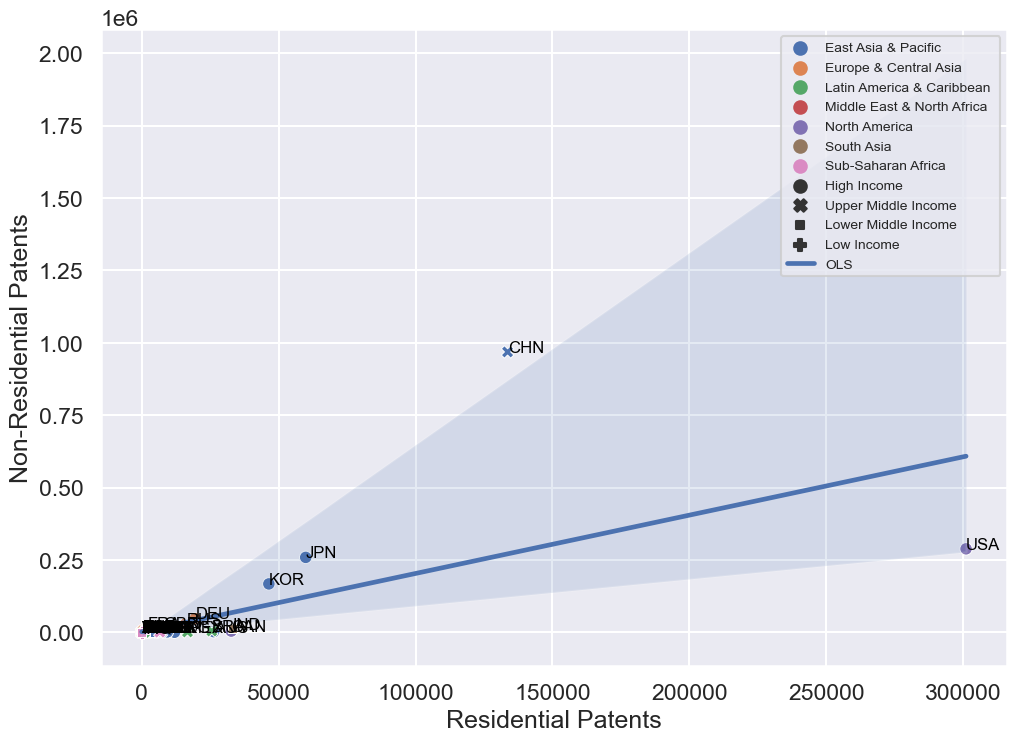

In [52]:
g = my_xy_plot(df_2015, 
               x='IP.PAT.NRES', 
               y='IP.PAT.RESD', 
               xlabel='Residential Patents', 
               ylabel='Non-Residential Patents', 
               OLS=True, 
               labels=True, 
#                ylogscale = True,
#                xlogscale = True,
               #size="ln_pop", 
               #sizes=(10, 400), 
               filename='res-vs-non-res-patents.pdf')

In [53]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36', 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8'}

url = 'https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip'
r = requests.get(url, headers=headers)
countries = gp.read_file(io.BytesIO(r.content))

Text(0.5, 1.0, '2015 Patents')

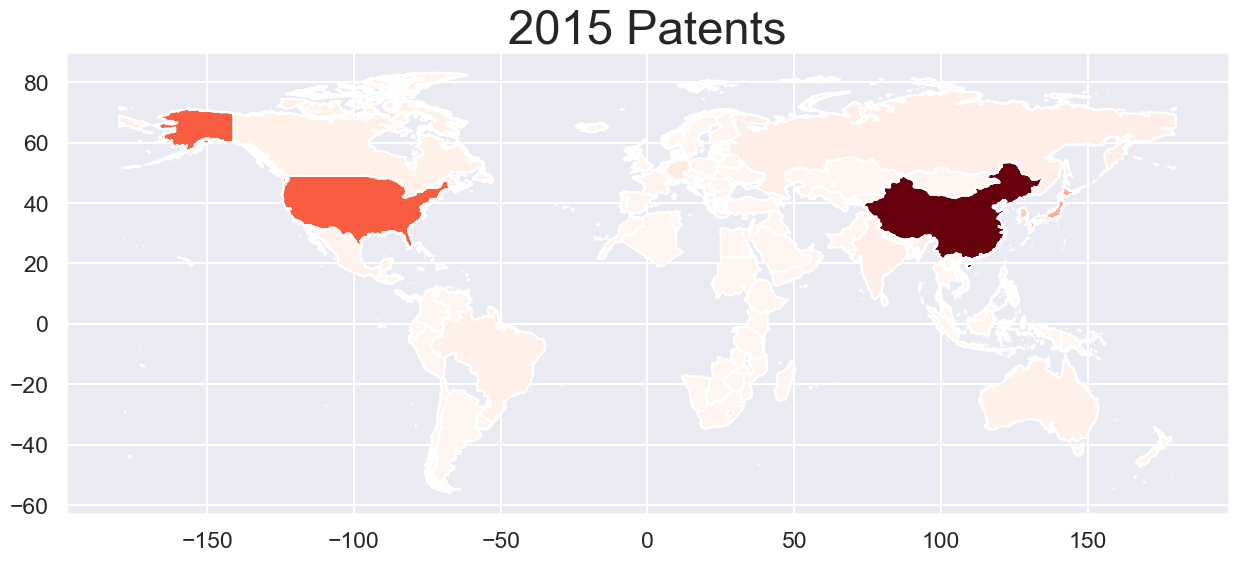

In [54]:
df_2015 = countries.merge(df_2015, left_on='ADM0_A3', right_on='iso3c')
fig, ax = plt.subplots(figsize=(15,10))
df_2015.plot(column='total_patents', ax=ax, cmap='Reds')
ax.set_title("2015 Patents", fontdict={'fontsize':34})

In [55]:
scheme = mc.Quantiles(df_2015['total_patents'], k=5)
classifier = mc.Quantiles.make(k=5, rolling=True)
df_2015['total_patents_q'] = classifier(df_2015['total_patents'])
df_2015['total_patents_qc'] = df_2015['total_patents_q'].apply(lambda x: scheme.get_legend_classes()[x].replace('[   ', '[').replace('( ', '('))

In [58]:
fig = px.choropleth(df_2015.sort_values('total_patents', ascending=True), 
                    locations="iso3c",
                    color="total_patents_qc",
                    hover_name='name',
                    hover_data=['iso3c', 'ln_pop'],
                    labels={
                        "total_patents": "Total Patents (" + str(2020) + ")",
                    },
                    color_discrete_sequence=px.colors.sequential.Reds,
                    height=600, 
                    width=1000,
                   )
fig.show()

In [60]:
fig = go.Figure(data=go.Choropleth(
    locations = df_2015['iso3c'],
    z = df_2015['total_patents'],
    text = df_2015['name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Total Patents',
    )                  
)
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
    margin=dict(
        l=5,
        r=5,
        b=10,
        t=10,
        pad=1
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [61]:
filtered_df = df[['year', 'name', 'ln_gdp_pc', 'total_patents', 'IP.PAT.RESD','IP.PAT.NRES', 'region', 'incomeLevel', 'iso3c']]
filtered_df

year      name  ln_gdp_pc  total_patents  IP.PAT.RESD  IP.PAT.NRES  \
0     2019    Angola   8.811655          110.0          2.0        108.0   
1     2018    Angola   8.851109          120.0          6.0        114.0   
2     1992    Angola   8.542171            6.0          4.0          2.0   
3     2019   Albania   9.521729            5.0          4.0          1.0   
4     2018   Albania   9.496804           18.0         15.0          3.0   
...    ...       ...        ...            ...          ...          ...   
3668  1984  Zimbabwe        NaN          225.0         34.0        191.0   
3669  1983  Zimbabwe        NaN          277.0         40.0        237.0   
3670  1982  Zimbabwe        NaN          271.0         41.0        230.0   
3671  1981  Zimbabwe        NaN          309.0         35.0        274.0   
3672  1980  Zimbabwe        NaN          320.0         39.0        281.0   

                     region          incomeLevel iso3c  
0       Sub-Saharan Africa   Lower Middle Income   AGO  
1       Sub-Saharan Africa   Lower Middle Income   AGO  
2       Sub-Saharan Africa   Lower Middle Income   AGO  
3     Europe & Central Asia  Upper Middle Income   ALB  
4     Europe & Central Asia  Upper Middle Income   ALB  
...                     ...                  ...   ...  
3668    Sub-Saharan Africa   Lower Middle Income   ZWE  
3669    Sub-Saharan Africa   Lower Middle Income   ZWE  
3670    Sub-Saharan Africa   Lower Middle Income   ZWE  
3671    Sub-Saharan Africa   Lower Middle Income   ZWE  
3672    Sub-Saharan Africa   Lower Middle Income   ZWE  

[3673 rows x 9 columns]

In [62]:
print(filtered_df.ln_gdp_pc.min())
print(filtered_df.ln_gdp_pc.max())

6.461862654729543
11.995175454631555


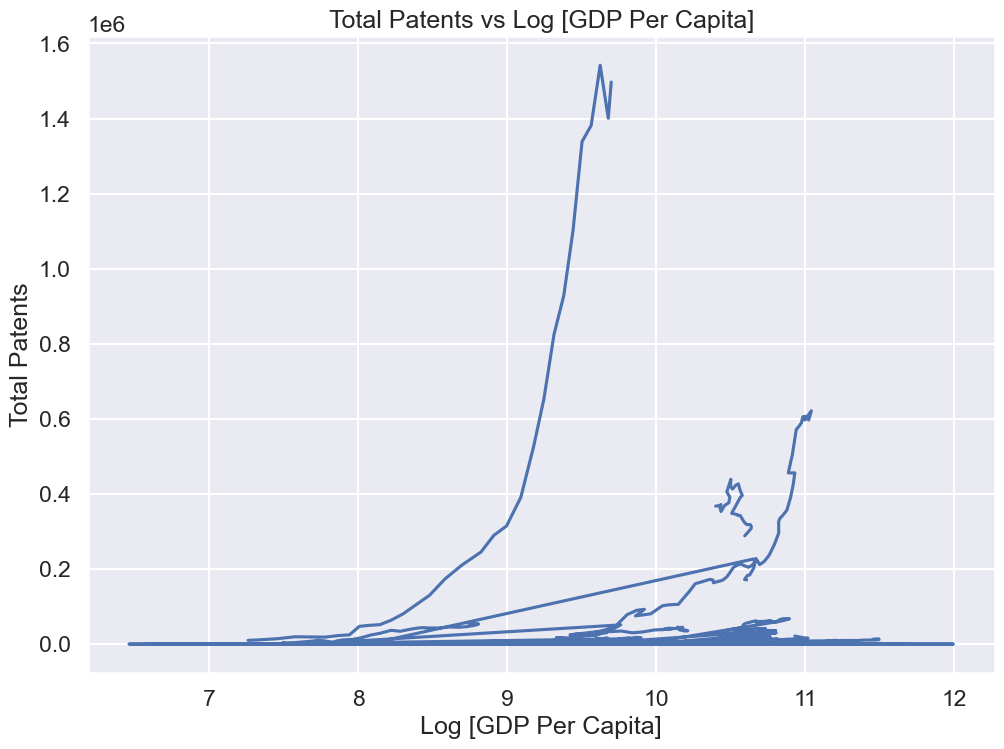

In [63]:
plt.plot(filtered_df['ln_gdp_pc'], filtered_df['total_patents'])
plt.xlabel("Log [GDP Per Capita]")
plt.ylabel("Total Patents")
plt.title("Total Patents vs Log [GDP Per Capita]")
plt.show()

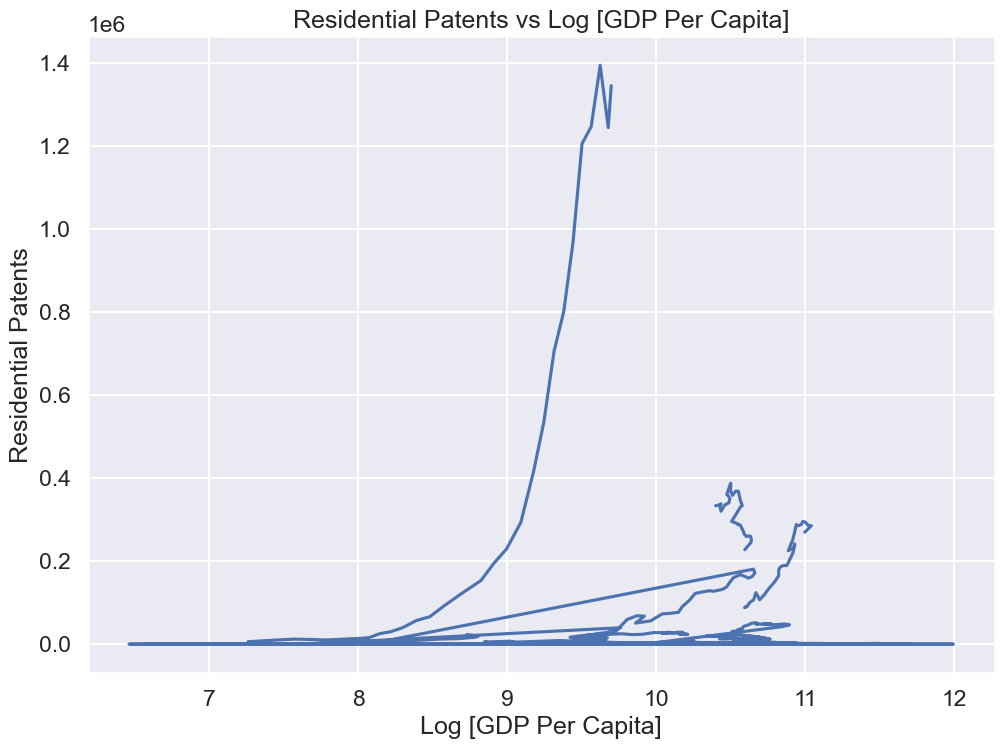

In [64]:
plt.plot(filtered_df['ln_gdp_pc'], filtered_df['IP.PAT.RESD'])
plt.xlabel("Log [GDP Per Capita]")
plt.ylabel("Residential Patents")
plt.title("Residential Patents vs Log [GDP Per Capita]")
plt.show()

[<center><img src="https://github.com/measuring-culture/Expanding-Measurement-Culture-Facebook-JRSI/blob/main/pics/SMUlogowWordmarkRB.jpg?raw=true" width="250"></center>](http://omerozak.com)